In [1]:
import pandas as pd
import numpy as np
#from polygon import RESTClient
import datetime
import json
import requests
import os
import math
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def financials(ticker):
    financials = "https://api.polygon.io/v2/reference/financials/"+ticker+"?limit=80&type=Q&apiKey=XrTJjjYQpsWD5i9Gn1vBE1LEu1J1R5gJ"
    response_data = requests.get(financials).json()
    df = pd.DataFrame(response_data['results'])
    #df = df[["calendarDate", "assetsCurrent", 'cashAndEquivalentsUSD', "sharePriceAdjustedClose", 'investmentsCurrent', 'assetsCurrent', 'debtToEquityRatio', 'debtUSD', 'dividendYield', 'earningsBeforeInterestTaxesDepreciationAmortizationUSD', 'EBITDAMargin', 'shareholdersEquityUSD', 'enterpriseValue']]
    return df

In [5]:
tickers = ['HD']#, 'LOW', 'CAT', 'KR', 'WMT']
test_df = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    data = financials(ticker)
    #data = data.set_index('calendarDate')
    data = data.drop(['ticker', 'period', 'reportPeriod', 'updated', 'dateKey' ], axis=1)
    data = data.add_prefix(f'{ticker}_')
    test_df = pd.concat([test_df, data], axis=1, join='outer')



HD


In [6]:
test_df = test_df.rename(columns={'HD_calendarDate': 'calendarDate'})
test_df=test_df.set_index('calendarDate')
test_df.index = pd.to_datetime(test_df.index,dayfirst=False, yearfirst=True, format= "%d/%m/%Y", infer_datetime_format=True )

In [7]:
test_df

,HD_accumulatedOtherComprehensiveIncome,HD_assets,HD_assetsCurrent,HD_assetsNonCurrent,HD_bookValuePerShare,HD_capitalExpenditure,HD_cashAndEquivalents,HD_cashAndEquivalentsUSD,HD_costOfRevenue,HD_consolidatedIncome,...,HD_shares,HD_weightedAverageShares,HD_weightedAverageSharesDiluted,HD_salesPerShare,HD_tangibleAssetValue,HD_taxAssets,HD_incomeTaxExpense,HD_taxLiabilities,HD_tangibleAssetsBookValuePerShare,HD_workingCapital
calendarDate,,,,,,,,,,,,,,,,,,,,,
2019-12-31,-739000000,51236000000,19810000000,31426000000,-2.875,-771000000,2133000000,2133000000,17046000000,2481000000,...,1074741592,1084000000,1088000000,23.784,48982000000,0,630000000,1366000000,45.186,1435000000
2019-09-30,-801000000,52309000000,21174000000,31135000000,-0.994,-635000000,2193000000,2193000000,17836000000,2769000000,...,1090831020,1089000000,1094000000,24.998,50056000000,0,898000000,686000000,45.965,1609000000
2019-06-30,-776000000,52010000000,20699000000,31311000000,-1.059,-560000000,2547000000,2547000000,20407000000,3479000000,...,1095153073,1095000000,1099000000,28.163,49756000000,0,1134000000,766000000,45.439,1901000000
2019-03-31,-835000000,51515000000,20553000000,30962000000,-1.946,-675000000,1882000000,1882000000,17364000000,2513000000,...,1100286099,1101000000,1106000000,23.961,49265000000,0,811000000,789000000,44.746,880000000
2018-12-31,-772000000,44003000000,18529000000,25474000000,-1.683,-719000000,1778000000,1778000000,17464000000,2344000000,...,1103903507,1116000000,1122000000,23.737,41751000000,0,769000000,1158000000,37.411,1813000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-03-31,-108000000,24076000000,9854000000,14222000000,6.727,-777000000,1363000000,1363000000,8545000000,632000000,...,2333638407,2326000000,2347000000,5.245,23769000000,0,398000000,932000000,10.219,3168000000
2000-12-31,-67000000,21385000000,7777000000,13608000000,6.464,-888000000,167000000,167000000,7245000000,465000000,...,2327253241,2321000000,2352000000,4.508,21071000000,0,294000000,571000000,9.078,3392000000
2000-09-30,-80000000,20726000000,7879000000,12847000000,6.239,-1059000000,284000000,284000000,8095000000,650000000,...,2321275452,2317000000,2352000000,4.983,20420000000,0,412000000,581000000,8.813,2790000000


In [8]:
return_period = 2

X=test_df.drop(columns = ['HD_enterpriseValueOverEBITDA']).diff(return_period).dropna()
Y=test_df.loc[:,'HD_enterpriseValueOverEBITDA'].diff(return_period).shift(-return_period).dropna()
df = pd.concat([Y, X], axis=1, join='outer').iloc[::return_period, :]
df = df.sort_index(ascending=False)

In [9]:
df

,HD_enterpriseValueOverEBITDA,HD_accumulatedOtherComprehensiveIncome,HD_assets,HD_assetsCurrent,HD_assetsNonCurrent,HD_bookValuePerShare,HD_capitalExpenditure,HD_cashAndEquivalents,HD_cashAndEquivalentsUSD,HD_costOfRevenue,...,HD_shares,HD_weightedAverageShares,HD_weightedAverageSharesDiluted,HD_salesPerShare,HD_tangibleAssetValue,HD_taxAssets,HD_incomeTaxExpense,HD_taxLiabilities,HD_tangibleAssetsBookValuePerShare,HD_workingCapital
calendarDate,,,,,,,,,,,,,,,,,,,,,
2019-09-30,-1.673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,-1.171,-34000000.0,-7.940000e+08,-6.210000e+08,-1.730000e+08,-0.952,-40000000.0,-3.110000e+08,-3.110000e+08,-4.720000e+08,...,9455079.0,12000000.0,12000000.0,-1.037,-7.910000e+08,0.0,-87000000.0,103000000.0,-1.219,-7.290000e+08
2018-09-30,1.847,118000000.0,-6.315000e+09,-7.440000e+08,-5.571000e+09,3.109,60000000.0,-1.180000e+08,-1.180000e+08,-2.130000e+08,...,29241655.0,34000000.0,35000000.0,-0.787,-6.323000e+09,0.0,-32000000.0,-137000000.0,-6.912,7.330000e+08
2018-03-31,-0.540,121000000.0,1.450000e+09,1.405000e+09,4.500000e+07,0.301,67000000.0,1.835000e+09,1.835000e+09,-8.210000e+08,...,24015857.0,17000000.0,17000000.0,-1.519,1.427000e+09,0.0,-41000000.0,78000000.0,0.681,1.468000e+09
2017-09-30,-0.578,-33000000.0,-1.627000e+09,-1.532000e+09,-9.500000e+07,0.713,55000000.0,-5.000000e+07,-5.000000e+07,4.800000e+07,...,14205008.0,16000000.0,16000000.0,-0.229,-1.563000e+09,0.0,530000000.0,282000000.0,-1.866,5.990000e+08
2017-03-31,-1.110,-294000000.0,-7.900000e+07,2.140000e+08,-2.930000e+08,1.130,48000000.0,1.600000e+07,1.600000e+07,-6.450000e+08,...,27806351.0,30000000.0,30000000.0,-1.487,4.300000e+07,0.0,-174000000.0,837000000.0,-0.882,-2.220000e+08
2016-09-30,1.054,40000000.0,-4.420000e+08,-5.480000e+08,1.060000e+08,1.286,4000000.0,2.400000e+07,2.400000e+07,-6.210000e+08,...,22606000.0,26000000.0,25000000.0,-1.022,-4.420000e+08,0.0,21000000.0,-877000000.0,-1.121,1.459000e+09
2016-03-31,1.163,305000000.0,7.400000e+07,-3.380000e+08,4.120000e+08,0.487,120000000.0,-3.320000e+08,-3.320000e+08,-1.410000e+08,...,25846337.0,23000000.0,23000000.0,-0.664,4.600000e+07,0.0,-78000000.0,839000000.0,-0.602,-1.056000e+09
2015-09-30,-1.443,-84000000.0,-4.240000e+08,-4.040000e+08,-2.000000e+07,0.929,-41000000.0,-2.170000e+08,-2.170000e+08,-7.170000e+08,...,23873956.0,21000000.0,22000000.0,-1.046,-4.120000e+08,0.0,-21000000.0,-270000000.0,-0.889,-1.231000e+09


In [10]:
#df.index = pd.to_datetime(df.index,dayfirst=False, yearfirst=True, format= "%d/%m/%Y", infer_datetime_format=True )

In [11]:
col_list = df.columns[:]


In [12]:
data = df.values[:, :]
trans = StandardScaler()
data = trans.fit_transform(data)
dataset = pd.DataFrame(data)
dataset = dataset.dropna()
dataset

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
1,-0.596880,-0.278690,0.014261,-0.186051,0.208142,-1.103770,-0.181940,-0.274782,-0.274782,-0.357376,...,-0.473986,-0.574965,-0.608564,-1.034675,-0.003313,0.0,-0.535148,0.192442,-0.194441,-0.584103
2,0.700085,0.514814,-1.965542,-0.262929,-3.121535,2.891157,0.278518,-0.089086,-0.089086,0.071858,...,-0.045671,0.081919,0.080681,-0.536744,-2.592879,0.0,-0.138365,-0.272278,-4.503798,0.536502
3,-0.325712,0.530476,0.818948,1.080261,0.342613,0.128843,0.310750,1.790005,1.790005,-0.935765,...,-0.158793,-0.425673,-0.458728,-1.994686,1.034948,0.0,-0.203293,0.144033,1.243778,1.099870
4,-0.342042,-0.273470,-0.284449,-0.755453,0.256256,0.534140,0.255495,-0.023659,-0.023659,0.504406,...,-0.371166,-0.455531,-0.488696,0.574638,-0.364691,0.0,3.916032,0.539046,-0.684192,0.433793
5,-0.570666,-1.636001,0.270656,0.335850,0.134122,0.944356,0.223263,0.039843,0.039843,-0.644085,...,-0.076741,-0.037514,-0.069155,-1.930950,0.387088,0.0,-1.162786,1.613711,0.060654,-0.195494
6,0.359298,0.107621,0.140486,-0.140423,0.380240,1.097817,0.020662,0.047540,0.047540,-0.604310,...,-0.189312,-0.156948,-0.218991,-1.004799,0.160056,0.0,0.243989,-1.705166,-0.120259,1.092972
7,0.406140,1.491034,0.325521,-0.009167,0.568991,0.311817,0.554793,-0.294987,-0.294987,0.191181,...,-0.119169,-0.246523,-0.278925,-0.291762,0.388493,0.0,-0.470220,1.617584,0.272602,-0.834744
8,-0.713770,-0.539712,0.146941,-0.050419,0.302518,0.746626,-0.186545,-0.184339,-0.184339,-0.763408,...,-0.161865,-0.306240,-0.308892,-1.052600,0.174100,0.0,-0.059009,-0.529811,0.055355,-0.968880
9,-0.374703,1.647647,-0.289827,-0.179800,-0.321102,0.897137,0.209449,-0.180491,-0.180491,-0.473385,...,-0.005557,-0.037514,-0.039188,-1.184054,-0.049655,0.0,-1.285428,0.616499,-0.370812,-1.282373
10,-0.583988,1.511916,-0.058892,-0.576695,0.467830,0.352150,-0.214172,-0.597104,-0.597104,-0.206564,...,-0.270589,-0.067373,-0.099122,-0.234002,-0.064635,0.0,0.655200,-1.480551,-0.321610,2.656606


In [13]:
dataset.columns = col_list    

In [14]:
#df

df_dates = df.copy()
df_dates=df_dates.reset_index()
df_dates = df_dates[['calendarDate']]


In [15]:
#df_dates=df_dates[1:]
df_dates

,calendarDate
0,2019-09-30
1,2019-03-31
2,2018-09-30
3,2018-03-31
4,2017-09-30
5,2017-03-31
6,2016-09-30
7,2016-03-31
8,2015-09-30
9,2015-03-31


In [16]:
df2 = pd.concat([df_dates, dataset], axis=1, join='outer')
df2 = df2.dropna()
df2 = df2.set_index('calendarDate')
#df2.sort_index(ascending=False)

In [17]:


# Y = np.log(test_df.loc[:,'HD_enterpriseValueOverEBITDA']).diff(return_period).shift(-return_period)
# Y.name = Y.name +'_pred'
# Y = Y.dropna()
# #for ticker in tickers:
# X = np.log(test_df.drop(columns = ['HD_enterpriseValueOverEBITDA'])).diff(return_period)
# X.dropna()


# dataset = pd.concat([Y, X], axis=1, join='outer').iloc[::return_period, :]
# dataset=dataset.dropna(axis=1, how='all')
# dataset.describe()


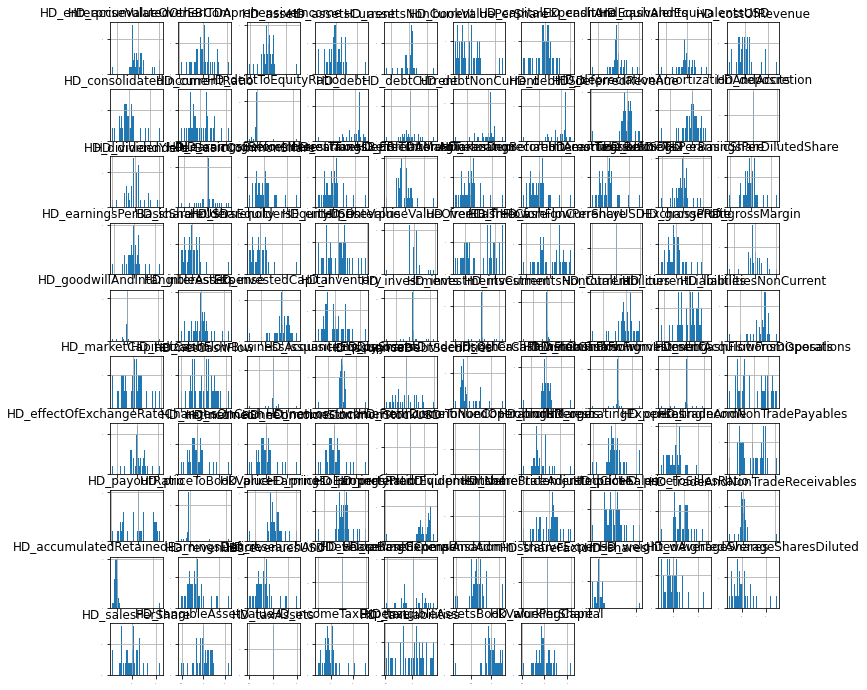

In [18]:
df2.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()


<AxesSubplot:title={'center':'Correlation Matrix'}>

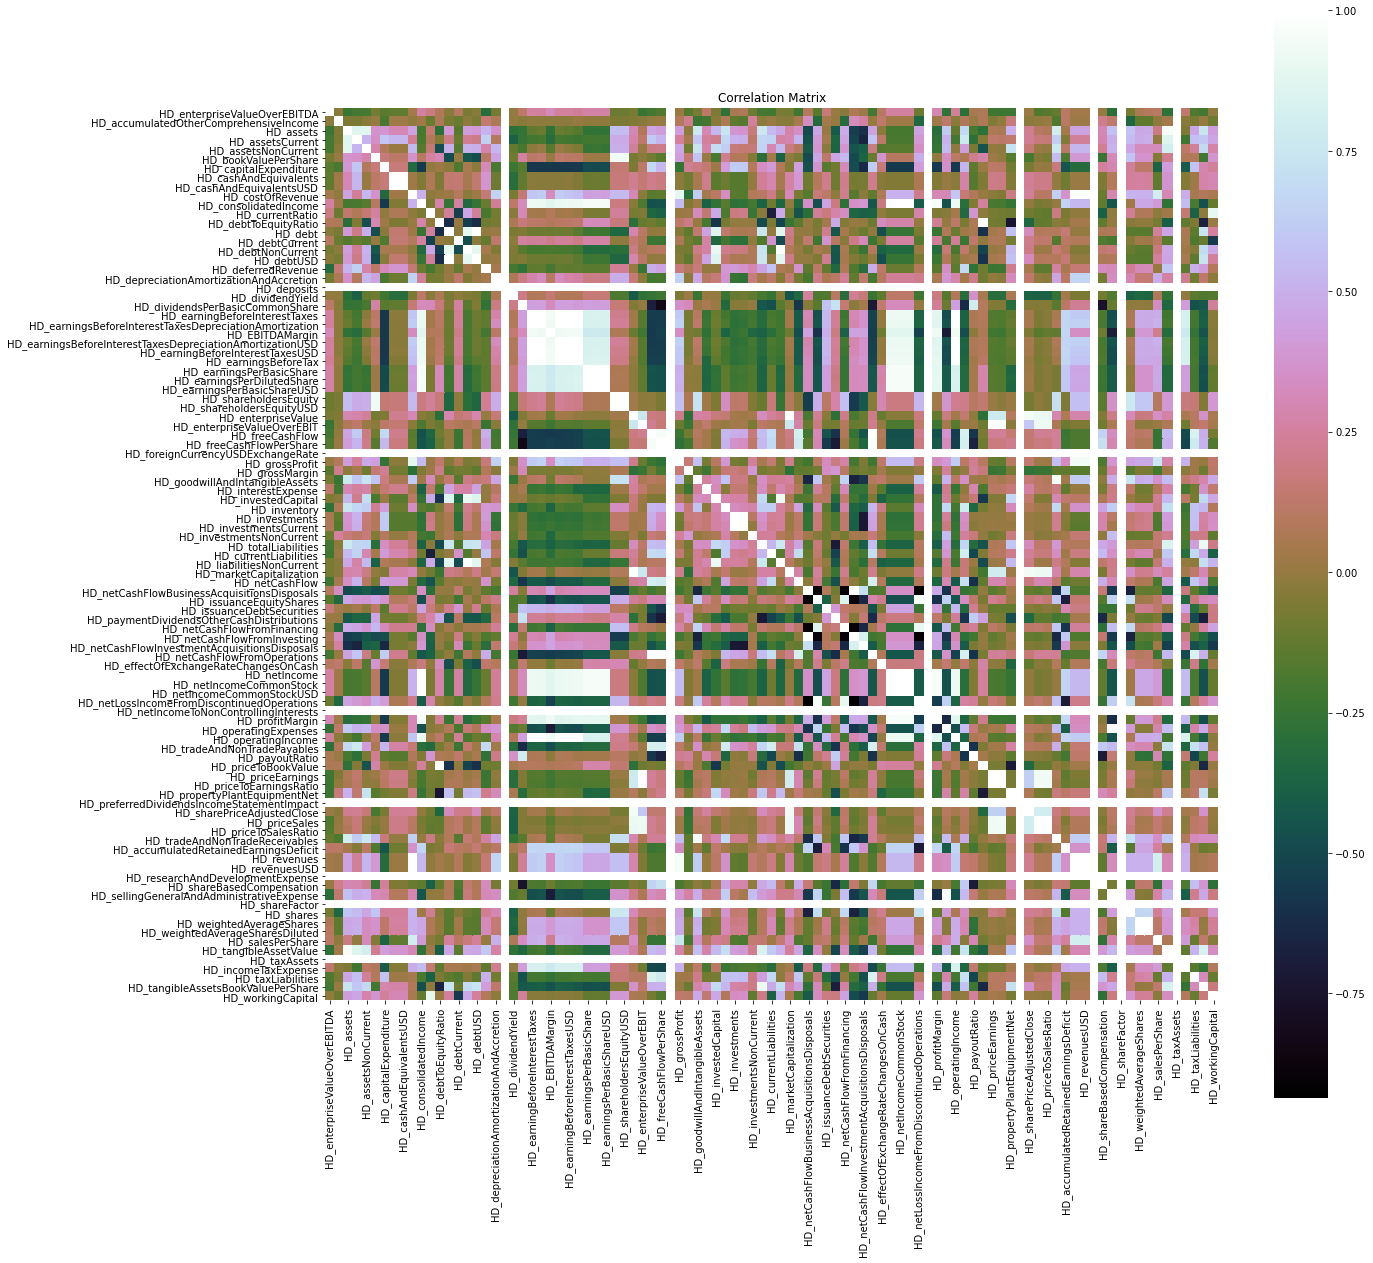

In [19]:
correlation = dataset.corr()
pyplot.figure(figsize=(20,20))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=False,cmap='cubehelix')


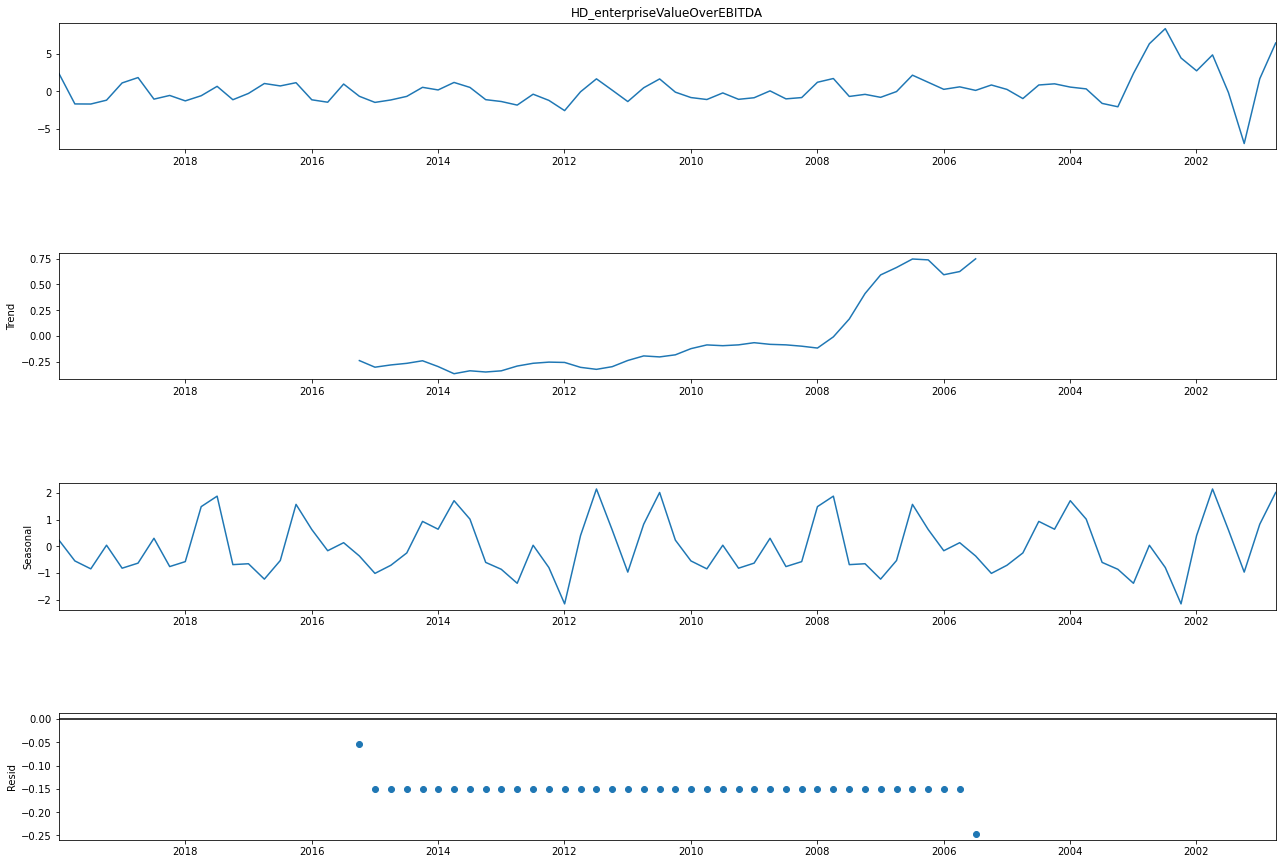

In [20]:
res = sm.tsa.seasonal_decompose(Y,freq=39) 
fig = res.plot()
fig.set_figheight(14)
fig.set_figwidth(20)
pyplot.show()

In [21]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)] 
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [22]:
num_folds = 10
scoring = 'neg_mean_squared_error'


In [23]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
HD_priceToEarningsRatio,1888.263937
HD_enterpriseValueOverEBIT,1858.816844
HD_priceEarnings,1757.495675
HD_priceSales,744.806725
HD_priceToSalesRatio,693.725738
HD_enterpriseValue,143.135044
HD_marketCapitalization,136.927204
HD_sharePriceAdjustedClose,61.841959
HD_dividendYield,8.777575


In [24]:
X = X[['HD_priceToEarningsRatio', 'HD_enterpriseValueOverEBIT', 'HD_priceEarnings', 'HD_priceSales', 'HD_priceToSalesRatio', 'HD_enterpriseValue', 'HD_marketCapitalization', 'HD_sharePriceAdjustedClose', 'HD_dividendYield', 'HD_issuanceEquityShares']]
X

,HD_priceToEarningsRatio,HD_enterpriseValueOverEBIT,HD_priceEarnings,HD_priceSales,HD_priceToSalesRatio,HD_enterpriseValue,HD_marketCapitalization,HD_sharePriceAdjustedClose,HD_dividendYield,HD_issuanceEquityShares
calendarDate,,,,,,,,,,
2019-06-30,3.941,2.0,3.955,0.400,0.370,4.031032e+10,4.362832e+10,36.45,-0.009,1.833000e+09
2019-03-31,-2.799,-2.0,-3.070,-0.264,-0.259,-3.231050e+10,-3.176850e+10,-30.77,0.000,-7.200000e+07
2018-12-31,-2.171,-2.0,-2.465,-0.233,-0.175,-3.366745e+10,-2.916545e+10,-28.15,0.001,-3.221000e+09
2018-09-30,-0.702,-1.0,-0.526,-0.099,-0.091,-2.639269e+10,-1.809669e+10,-20.94,0.001,-1.048000e+09
2018-06-30,4.012,2.0,4.383,0.257,0.199,1.386689e+10,1.928289e+10,10.17,-0.004,2.460000e+09
...,...,...,...,...,...,...,...,...,...,...
2001-03-31,9.032,6.0,8.956,0.488,0.484,1.557391e+10,1.530391e+10,6.74,-0.001,5.200000e+07
2000-12-31,-0.987,0.0,-1.211,0.003,-0.006,-5.624271e+09,-6.983271e+09,-2.80,0.000,0.000000e+00
2000-09-30,-13.851,-9.0,-13.972,-0.600,-0.594,-3.204921e+10,-3.263521e+10,-13.79,0.001,-7.700000e+07


In [25]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [26]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [27]:
#models.append(('MLP', MLPRegressor()))

In [28]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [29]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds) #random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.045159 (0.057356) 0.024461 0.217674
LASSO: 0.405450 (0.285375) 0.315631 9.159004
EN: 0.262098 (0.239587) 0.166784 5.706240
KNN: 0.550473 (0.405588) 0.355824 9.763793
CART: 0.125432 (0.080454) 0.000000 6.790633
SVR: 0.512332 (0.449148) 0.330879 9.800892
ABR: 0.102381 (0.101269) 0.018803 7.555156
GBR: 0.095571 (0.071476) 0.000162 6.922497
RFR: 0.092327 (0.093217) 0.012864 7.821693
ETR: 0.066635 (0.055503) 0.000000 7.484294


In [30]:
kfold_results

[array([0.21242362, 0.01996451, 0.05604235, 0.02620758, 0.01790933,
        0.01343446, 0.01640465, 0.03359896, 0.04354022, 0.01206571]),
 array([0.20122568, 0.15481493, 0.45772525, 0.18058655, 0.20039586,
        0.55200532, 0.58079021, 1.11063962, 0.45993705, 0.15638081]),
 array([0.10555641, 0.09714119, 0.29846445, 0.08321042, 0.10135018,
        0.33184853, 0.30700791, 0.91781809, 0.27784962, 0.10072877]),
 array([0.24834414, 0.21237031, 0.48622359, 0.28070277, 0.23991693,
        0.5846223 , 0.92277521, 1.53140359, 0.78097396, 0.2173957 ]),
 array([0.27424914, 0.05525771, 0.06940717, 0.17221917, 0.04379233,
        0.22490383, 0.04803117, 0.0714465 , 0.0932425 , 0.2017715 ]),
 array([0.83817124, 0.11102865, 0.23460123, 0.0965511 , 0.24568651,
        0.48906814, 0.71385281, 1.59671481, 0.70395299, 0.09369543]),
 array([0.36779129, 0.04499101, 0.10735272, 0.02051363, 0.04920862,
        0.19599418, 0.09307868, 0.02644602, 0.08068731, 0.03774491]),
 array([0.27821252, 0.02966664, 0.

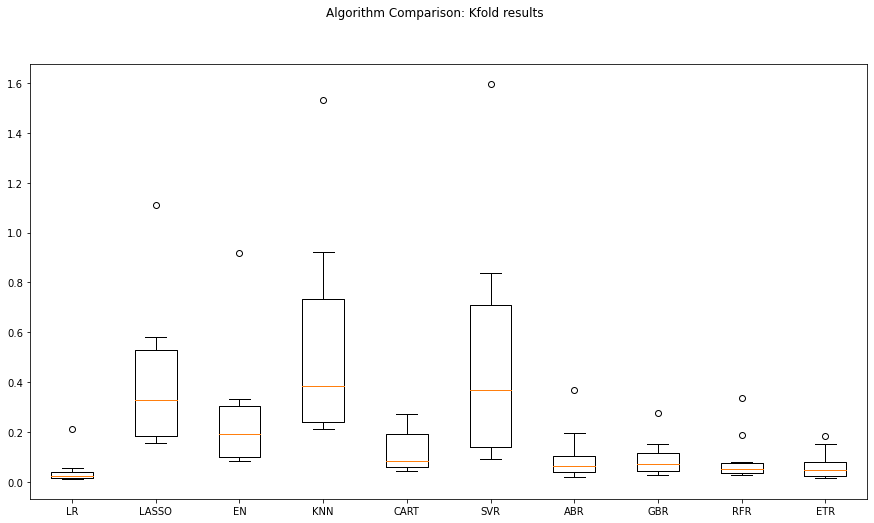

In [31]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

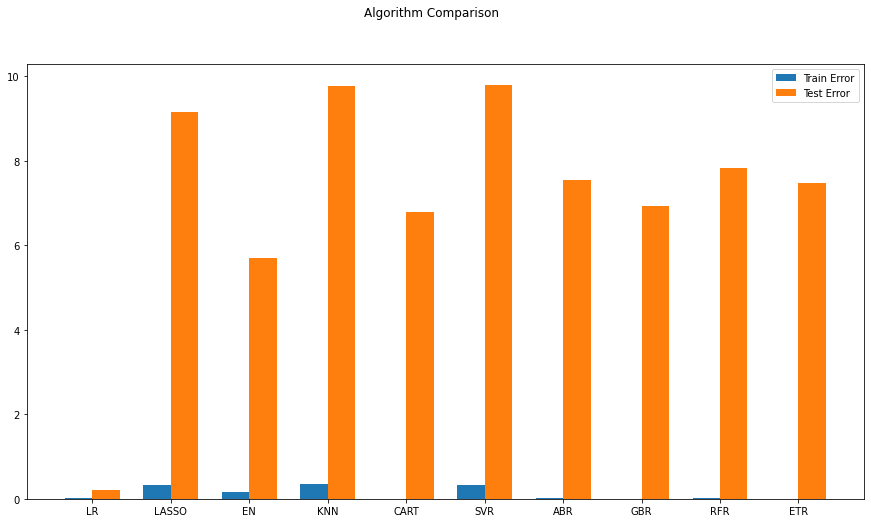

In [32]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [33]:
enterpriseValueOverEBITDA = LinearRegression()
enterpriseValueOverEBITDA.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = enterpriseValueOverEBITDA.predict(X_test)

Text(0.5, 1.0, 'enterpriseValueOverEBITDA')

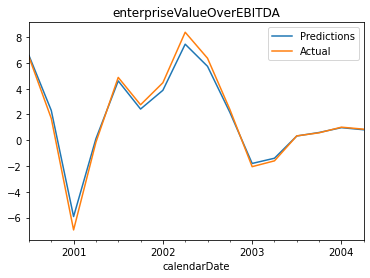

In [35]:
results = pd.DataFrame({"Predictions": y_pred, "Actual": Y_test})
results.plot()
plt.title('enterpriseValueOverEBITDA')